# KNMI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'result.txt'

In [3]:
df = pd.read_csv(filename, comment='#', names=['STN','YYYYMMDD','TG'])
df

,STN,YYYYMMDD,TG
0,260,20240101,74
1,260,20240102,105
2,260,20240103,94
3,260,20240104,76
4,260,20240105,70
...,...,...,...
727,279,20241227,21
728,279,20241228,-9
729,279,20241229,32
730,279,20241230,65


In [4]:
df['TGEM'] = df['TG']/10

In [5]:
df['DATUM'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

In [6]:
df['STATION'] = df['STN'].replace({260:'De Bilt', 279:'Hoogeveen'})

In [7]:
df

,STN,YYYYMMDD,TG,TGEM,DATUM,STATION
0,260,20240101,74,7.4,2024-01-01,De Bilt
1,260,20240102,105,10.5,2024-01-02,De Bilt
2,260,20240103,94,9.4,2024-01-03,De Bilt
3,260,20240104,76,7.6,2024-01-04,De Bilt
4,260,20240105,70,7.0,2024-01-05,De Bilt
...,...,...,...,...,...,...
727,279,20241227,21,2.1,2024-12-27,Hoogeveen
728,279,20241228,-9,-0.9,2024-12-28,Hoogeveen
729,279,20241229,32,3.2,2024-12-29,Hoogeveen
730,279,20241230,65,6.5,2024-12-30,Hoogeveen


In [8]:
df_pivot = pd.pivot(df, index='DATUM', columns='STATION', values='TGEM')

In [9]:
df_pivot

STATION,De Bilt,Hoogeveen
DATUM,,
2024-01-01,7.4,6.9
2024-01-02,10.5,9.3
2024-01-03,9.4,8.8
2024-01-04,7.6,4.6
2024-01-05,7.0,4.8
...,...,...
2024-12-27,2.5,2.1
2024-12-28,1.0,-0.9
2024-12-29,4.0,3.2


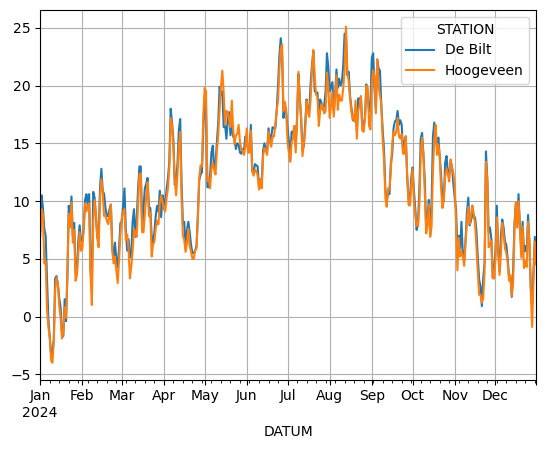

In [14]:
df_pivot.plot()

plt.grid()
plt.show()

In [22]:
verschil = df_pivot['Hoogeveen'] - df_pivot['De Bilt']
verschil

DATUM
2024-01-01   -0.5
2024-01-02   -1.2
2024-01-03   -0.6
2024-01-04   -3.0
2024-01-05   -2.2
             ... 
2024-12-27   -0.4
2024-12-28   -1.9
2024-12-29   -0.8
2024-12-30   -0.4
2024-12-31   -0.1
Length: 366, dtype: float64

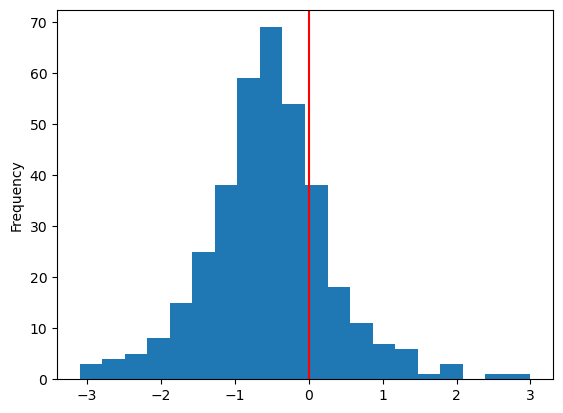

In [29]:
verschil.plot(kind='hist', bins=20)
plt.axvline(0, color='red')
plt.show()

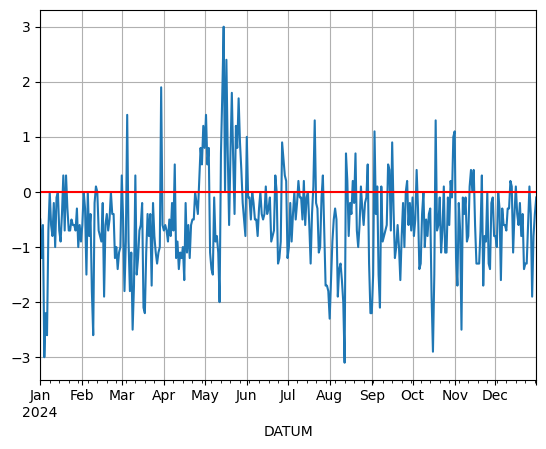

In [30]:
verschil.plot()
plt.axhline(0, color='red')
plt.grid()
plt.show()